In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Load the forex data

In [2]:
# get current working directory
os.getcwd()

path_to_data = os.path.join(os.path.dirname(os.getcwd()), 'data', 'EURUSD_1m.csv')
df = pd.read_csv(path_to_data, sep='\t', parse_dates=True, names=['Date', 'open', 'high', 'low', 'close', 'volume'], index_col='Date')
df.head()

,open,high,low,close,volume
Date,,,,,
2023-01-08 22:23:00,1.06520,1.06542,1.06519,1.06541,248
2023-01-08 22:24:00,1.06541,1.06541,1.06512,1.06513,140
2023-01-08 22:25:00,1.06516,1.06522,1.06512,1.06514,166
2023-01-08 22:26:00,1.06516,1.06540,1.06514,1.06537,94
2023-01-08 22:27:00,1.06538,1.06548,1.06536,1.06546,149


In [3]:
df.index.dtype

dtype('<M8[ns]')

In [4]:
from environments.utils import add_time_features_forex
df = add_time_features_forex(df)
df.head()

,open,high,low,close,volume,sin_weekday,cos_weekday,sin_monthday,cos_monthday,sin_yearday,cos_yearday,sin_hour,cos_hour,sin_minute,cos_minute
Date,,,,,,,,,,,,,,,
2023-01-08 22:23:00,1.06520,1.06542,1.06519,1.06541,248,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.5,0.866025,0.669131,-0.743145
2023-01-08 22:24:00,1.06541,1.06541,1.06512,1.06513,140,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.5,0.866025,0.587785,-0.809017
2023-01-08 22:25:00,1.06516,1.06522,1.06512,1.06514,166,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.5,0.866025,0.500000,-0.866025
2023-01-08 22:26:00,1.06516,1.06540,1.06514,1.06537,94,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.5,0.866025,0.406737,-0.913545
2023-01-08 22:27:00,1.06538,1.06548,1.06536,1.06546,149,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.5,0.866025,0.309017,-0.951057


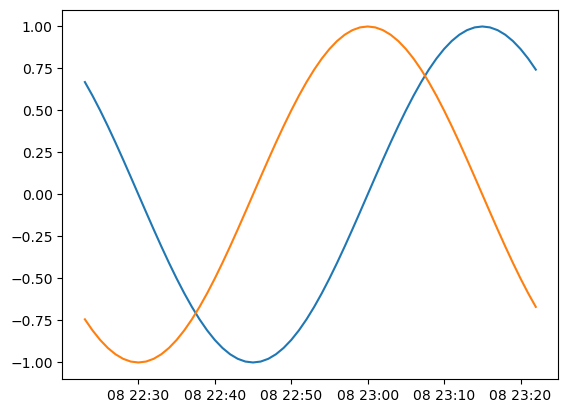

In [9]:
# plot sin and cos of first 1000 values
plt.plot(df.index[:60], df['sin_minute'][:60])
plt.plot(df.index[:60], df['cos_minute'][:60])
plt.show()

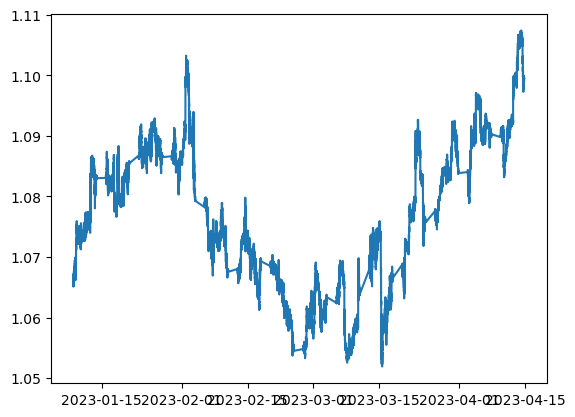

In [12]:
# plot close price
plt.plot(df.index, df['close'])
plt.show()

In [11]:
from environments.utils import add_ta_features
# check how indicators work on sample data
df_sample = df[:1000]
df_sample = add_ta_features(df_sample)
df_sample.head(50)

C:\Users\Maciej\PycharmProjects\FinDL\environments\utils.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[func] = getattr(TA, func)(df_)
C:\Users\Maciej\PycharmProjects\FinDL\environments\utils.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[func] = getattr(TA, func)(df_)
C:\Users\Maciej\PycharmProjects\FinDL\environments\utils.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,open,high,low,close,volume,sin_weekday,cos_weekday,sin_monthday,cos_monthday,sin_yearday,...,VAMA,VBM,VFI,VPT,VWAP,VZO,WILLIAMS,WMA,WOBV,ZLEMA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-08 22:23:00,1.06520,1.06542,1.06519,1.06541,248,-0.781831,0.62349,0.998717,-0.050649,0.137279,...,NaN,NaN,NaN,452.869565,1.065340,0.000000,NaN,NaN,NaN,NaN
2023-01-08 22:24:00,1.06541,1.06541,1.06512,1.06513,140,-0.781831,0.62349,0.998717,-0.050649,0.137279,...,NaN,NaN,NaN,182.524738,1.065297,-39.444027,NaN,NaN,-0.03920,NaN
2023-01-08 22:25:00,1.06516,1.06522,1.06512,1.06514,166,-0.781831,0.62349,0.998717,-0.050649,0.137279,...,NaN,NaN,NaN,116.124738,1.065256,9.431129,NaN,NaN,-0.03754,NaN
2023-01-08 22:26:00,1.06516,1.06540,1.06514,1.06537,94,-0.781831,0.62349,0.998717,-0.050649,0.137279,...,NaN,NaN,NaN,267.970891,1.065263,26.307505,NaN,NaN,-0.01592,NaN
2023-01-08 22:27:00,1.06538,1.06548,1.06536,1.06546,149,-0.781831,0.62349,0.998717,-0.050649,0.137279,...,NaN,NaN,NaN,466.637558,1.065295,45.038637,NaN,NaN,-0.00251,NaN
2023-01-08 22:28:00,1.06547,1.06551,1.06541,1.06551,222,-0.781831,0.62349,0.998717,-0.050649,0.137279,...,NaN,NaN,NaN,644.237558,1.065334,61.752008,NaN,NaN,0.00859,NaN
2023-01-08 22:29:00,1.06551,1.06571,1.06551,1.06563,485,-0.781831,0.62349,0.998717,-0.050649,0.137279,...,NaN,NaN,NaN,1226.237558,1.065425,78.348822,NaN,NaN,0.06679,NaN
2023-01-08 22:30:00,1.06562,1.06572,1.06521,1.06522,180,-0.781831,0.62349,0.998717,-0.050649,0.137279,...,NaN,NaN,NaN,943.884617,1.065421,50.401134,NaN,NaN,-0.00701,NaN
2023-01-08 22:31:00,1.06522,1.06553,1.06521,1.06551,222,-0.781831,0.62349,0.998717,-0.050649,0.137279,...,NaN,NaN,NaN,1346.259617,1.065420,59.444903,NaN,1.065415,0.05737,NaN


In [2]:
# check processing pipeline
from environments.utils import process_forex_data
path_to_data = os.path.join(os.path.dirname(os.getcwd()), 'data', 'EURUSD_1m.csv')
df = pd.read_csv(path_to_data, sep='\t', parse_dates=True, names=['Date', 'open', 'high', 'low', 'close', 'volume'], index_col='Date')
df.head()

,open,high,low,close,volume
Date,,,,,
2023-01-08 22:23:00,1.06520,1.06542,1.06519,1.06541,248
2023-01-08 22:24:00,1.06541,1.06541,1.06512,1.06513,140
2023-01-08 22:25:00,1.06516,1.06522,1.06512,1.06514,166
2023-01-08 22:26:00,1.06516,1.06540,1.06514,1.06537,94
2023-01-08 22:27:00,1.06538,1.06548,1.06536,1.06546,149


In [3]:
# run test on sample data
df_sample = df[:1000]
df_sample_processed_train, df_sample_processed_tes = process_forex_data(df_sample, scale_to_std=False, scale_min_max=True)
df_sample_processed_train.head(50)

C:\Users\Maciej\PycharmProjects\FinDL\environments\utils.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[func] = getattr(TA, func)(df_)
C:\Users\Maciej\PycharmProjects\FinDL\environments\utils.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[func] = getattr(TA, func)(df_)
C:\Users\Maciej\PycharmProjects\FinDL\environments\utils.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,open,high,low,close,volume,ADL,ADX,AO,ATR,BBWIDTH,...,sin_weekday,cos_weekday,sin_monthday,cos_monthday,sin_yearday,cos_yearday,sin_hour,cos_hour,sin_minute,cos_minute
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-08 22:23:00,0.004115,0.020640,0.007231,0.028747,0.173217,0.060498,NaN,NaN,NaN,NaN,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,6.691306e-01,-7.431448e-01
2023-01-08 22:24:00,0.025720,0.019608,0.000000,0.000000,0.094614,0.050951,NaN,NaN,NaN,NaN,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,5.877853e-01,-8.090170e-01
2023-01-08 22:25:00,0.000000,0.000000,0.000000,0.001027,0.113537,0.043656,NaN,NaN,NaN,NaN,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,5.000000e-01,-8.660254e-01
2023-01-08 22:26:00,0.000000,0.018576,0.002066,0.024641,0.061135,0.048952,NaN,NaN,NaN,NaN,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,4.067366e-01,-9.135455e-01
2023-01-08 22:27:00,0.022634,0.026832,0.024793,0.033881,0.101164,0.056227,NaN,NaN,NaN,NaN,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,3.090170e-01,-9.510565e-01
2023-01-08 22:28:00,0.031893,0.029928,0.029959,0.039014,0.154294,0.072488,NaN,NaN,NaN,NaN,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,2.079117e-01,-9.781476e-01
2023-01-08 22:29:00,0.036008,0.050568,0.040289,0.051335,0.345706,0.079592,NaN,NaN,NaN,NaN,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,1.045285e-01,-9.945219e-01
2023-01-08 22:30:00,0.047325,0.051600,0.009298,0.009240,0.123726,0.066925,NaN,NaN,NaN,NaN,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,5.665539e-16,-1.000000e+00
2023-01-08 22:31:00,0.006173,0.031992,0.009298,0.039014,0.154294,0.081153,NaN,NaN,NaN,NaN,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,-1.045285e-01,-9.945219e-01
